In [3]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("loan_data.csv")

In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Check if exists missing values

In [6]:
print("Missing values: ", df.isnull().sum())

Missing values:  credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


# Check if exists duplicated values

In [6]:
#see how many duplicated values exists
print("Duplicated values: ", df.duplicated().sum())

Duplicated values:  0


# Check the statistics of the dataset

In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Check which variables are categorical and numerical

In [8]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')
Categorical columns: 
 Index(['purpose'], dtype='object')


# One hot encoding to replace the categorial values (column purpose) with numeric values

In [7]:
le = LabelEncoder()
df['purpose'] = le.fit_transform(df['purpose'])
        
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')
Categorical columns: 
 Index([], dtype='object')


# Check the distribution of the target variable (not.fully.paid) to see if it's a case of unbalanced class

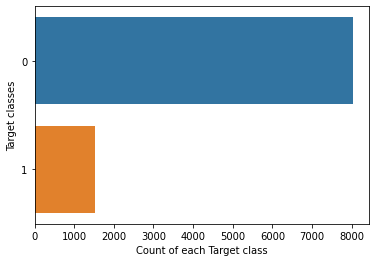

In [11]:
sns.countplot(y=df['not.fully.paid'] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

# Check the distribution of all the features

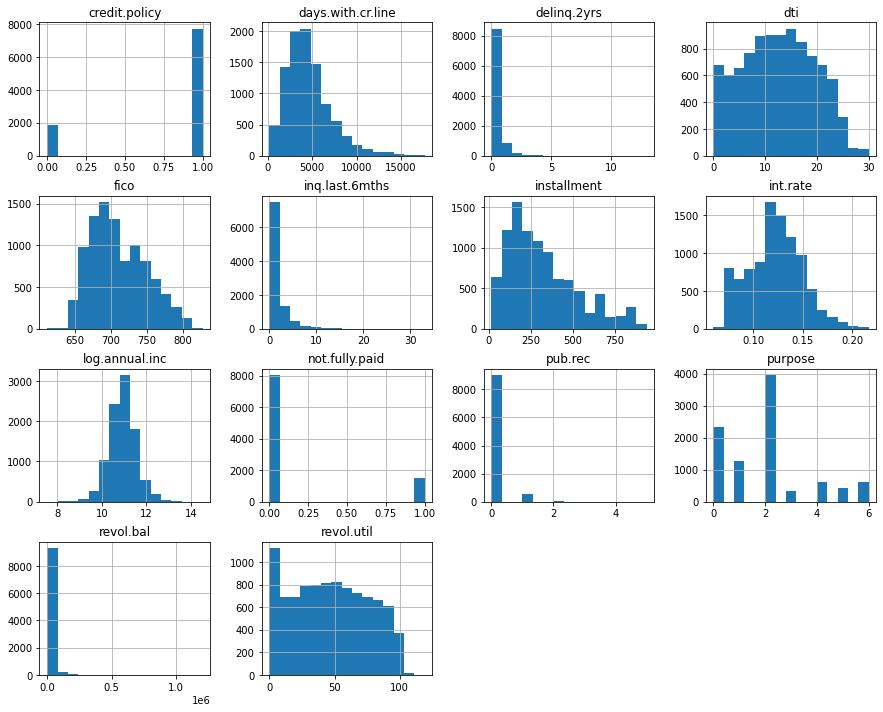

In [22]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

# Checking the features multicollinearity computing the correlation matrix

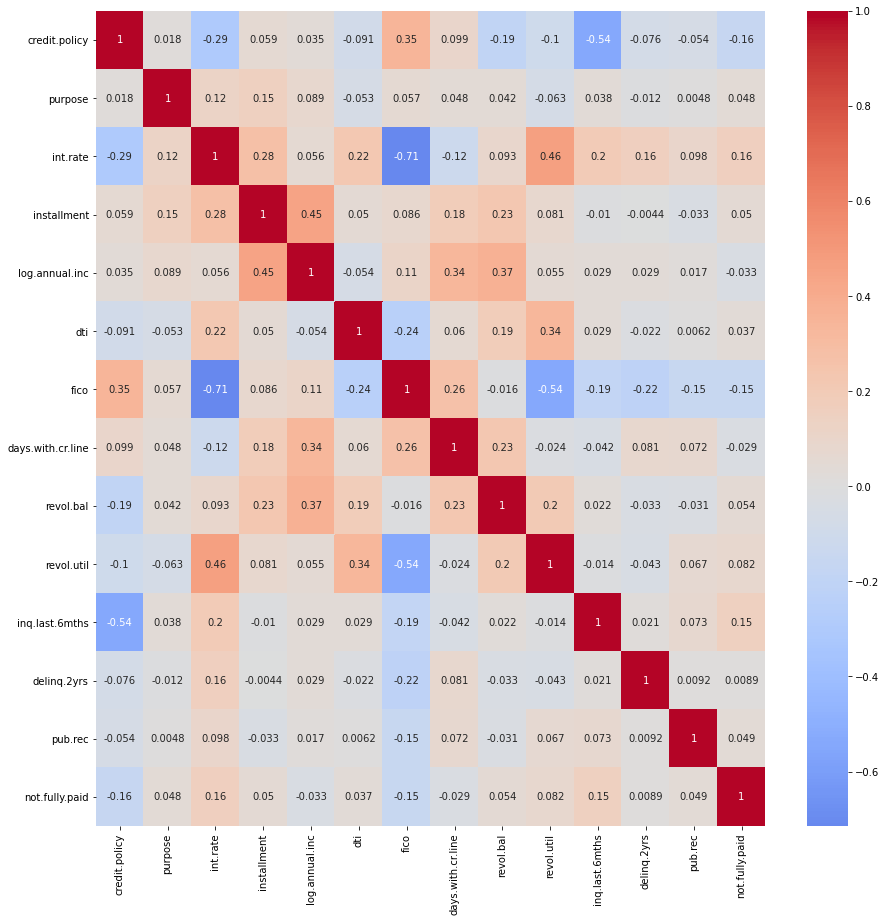

In [32]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='coolwarm',center=0)

In [8]:
from scipy import stats

# Remove the ouliers according to z-score value

In [9]:
df_without_outliers = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_without_outliers

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572,0,2,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


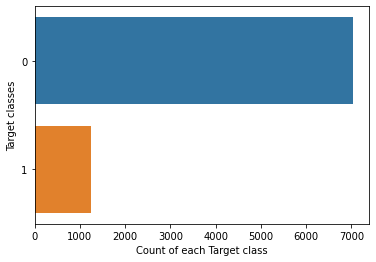

In [29]:
# Check the distribution of y variable to see if it's a case of unbalanced class
sns.countplot(y=df_without_outliers['not.fully.paid'] ,data=df_without_outliers)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

# Checking the features multicollinearity computing the new correlation matrix

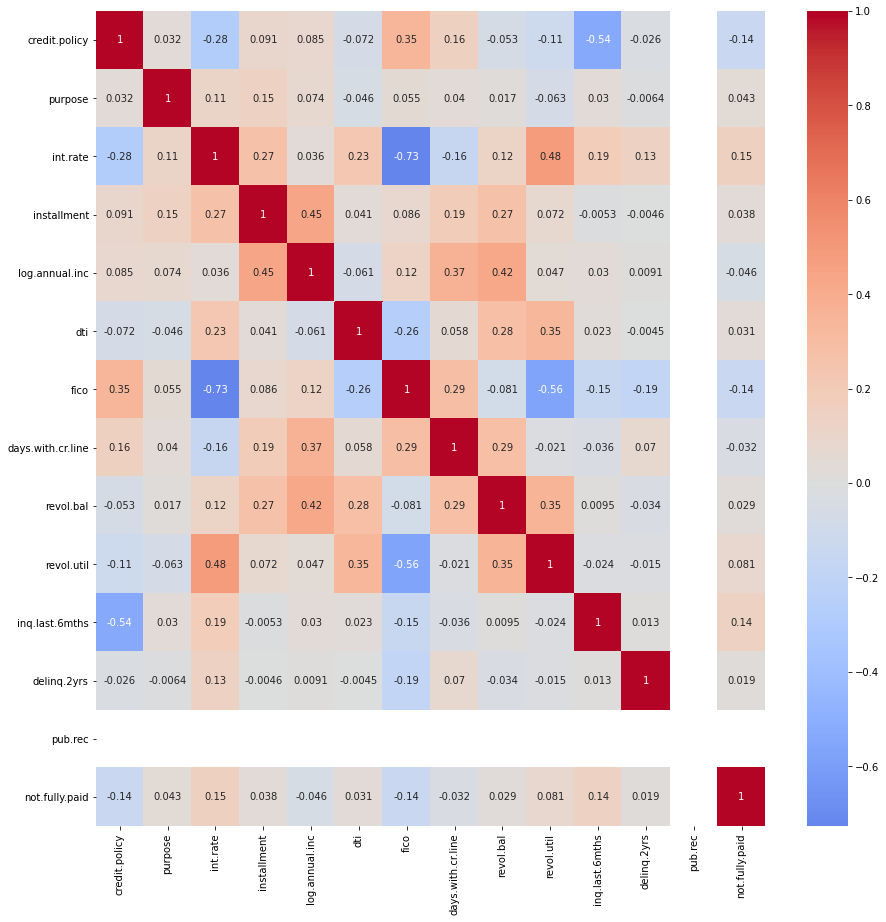

In [39]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df_without_outliers.corr(), annot=True,cmap='coolwarm',center=0)

# If you see the "pub.rec" variable, it only have 0 vales, after remove the outliers. Thus, I can remove this column, because it doesn't increase any information to my model

In [10]:
df_without_outliers['pub.rec'].value_counts()

0    8282
Name: pub.rec, dtype: int64

In [18]:
# Copy the datafrfame without outlier to a csv file to use it in another notebook
df_without_outliers.to_csv('loan_without_outliers.csv')

# Model Building

In [11]:
# Train test split
X = df_without_outliers.drop(['not.fully.paid', 'pub.rec'], axis = 1)
y = df_without_outliers['not.fully.paid']

In [14]:
def decision_tree(X,y,measure):
    
    # Splitting the dataset into the 70% for Training set and 30% for Test set
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
    
    clf = DecisionTreeClassifier(criterion=measure,random_state=0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
    print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
    print("\n Classification Report : \n",classification_report(y_test, y_pred))

## Decision Tree with criterion = gini

In [51]:
decision_tree(X,y,'gini')

Confusion Matrix : 
  [[1777  329]
 [ 307   72]]

 Accuracy Score : 
  0.7440643863179075

 Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      2106
           1       0.18      0.19      0.18       379

    accuracy                           0.74      2485
   macro avg       0.52      0.52      0.52      2485
weighted avg       0.75      0.74      0.75      2485



## Decision Tree with criterion = entropy

In [52]:
decision_tree(X,y,'entropy')

Confusion Matrix : 
  [[1763  343]
 [ 305   74]]

 Accuracy Score : 
  0.7392354124748491

 Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      2106
           1       0.18      0.20      0.19       379

    accuracy                           0.74      2485
   macro avg       0.51      0.52      0.52      2485
weighted avg       0.75      0.74      0.74      2485



# Using over-sampling techniques to balanced the classes

Here, I have imbalanced classes, the class 1 is much lower than class 0. Therefore, one solution is to increase instances by oversampling the minority class

In [17]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

## Testing  Naive random over-sampling (RandomOverSampler) method to create syntetic data

In [53]:
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_sample(X, y)

# Checking how many instances are in each class after balancing it
print(y_ros.value_counts())

1    7043
0    7043
Name: not.fully.paid, dtype: int64


In [54]:
decision_tree(X_ros,y_ros,'gini')

Confusion Matrix : 
  [[1698  372]
 [  37 2119]]

 Accuracy Score : 
  0.9032181732134406

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      2070
           1       0.85      0.98      0.91      2156

    accuracy                           0.90      4226
   macro avg       0.91      0.90      0.90      4226
weighted avg       0.91      0.90      0.90      4226



In [55]:
decision_tree(X_ros,y_ros,'entropy')

Confusion Matrix : 
  [[1687  383]
 [  28 2128]]

 Accuracy Score : 
  0.9027449124467581

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      2070
           1       0.85      0.99      0.91      2156

    accuracy                           0.90      4226
   macro avg       0.92      0.90      0.90      4226
weighted avg       0.91      0.90      0.90      4226



## Testing Synthetic Minority Oversampling Technique (SMOTE) method to create syntetic data

In [71]:
X_smote, y_smote = SMOTE(random_state = 0).fit_resample(X, y)

In [72]:
decision_tree(X_smote,y_smote,'gini')

Confusion Matrix : 
  [[1576  494]
 [ 448 1708]]

 Accuracy Score : 
  0.7770941788925698

 Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      2070
           1       0.78      0.79      0.78      2156

    accuracy                           0.78      4226
   macro avg       0.78      0.78      0.78      4226
weighted avg       0.78      0.78      0.78      4226



In [70]:
decision_tree(X_smote,y_smote,'entropy')

Confusion Matrix : 
  [[1578  492]
 [ 413 1743]]

 Accuracy Score : 
  0.7858495030761949

 Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.76      0.78      2070
           1       0.78      0.81      0.79      2156

    accuracy                           0.79      4226
   macro avg       0.79      0.79      0.79      4226
weighted avg       0.79      0.79      0.79      4226



## Testing Adaptive Synthetic (ADASYN) method to create syntetic data

In [59]:
X_ADASYN, y_ADASYN = ADASYN(random_state = 0).fit_resample(X, y)

In [60]:
decision_tree(X_ADASYN,y_ADASYN,'gini')

Confusion Matrix : 
  [[1533  554]
 [ 500 1600]]

 Accuracy Score : 
  0.7482684499641749

 Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      2087
           1       0.74      0.76      0.75      2100

    accuracy                           0.75      4187
   macro avg       0.75      0.75      0.75      4187
weighted avg       0.75      0.75      0.75      4187



In [61]:
decision_tree(X_ADASYN,y_ADASYN,'entropy')

Confusion Matrix : 
  [[1510  577]
 [ 484 1616]]

 Accuracy Score : 
  0.7465966085502747

 Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      2087
           1       0.74      0.77      0.75      2100

    accuracy                           0.75      4187
   macro avg       0.75      0.75      0.75      4187
weighted avg       0.75      0.75      0.75      4187



# Defining the best parameters to the classifier through Grid Search method

As we could see the best performance with balanced data was with  Naive random over-sampling (RandomOverSampler) method, therefore, I will use it to find the parameters

In [19]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,test_size=0.3,random_state=0)

In [20]:
dtclassifier = DecisionTreeClassifier()

# defining parameter range 
param_grid = {'criterion': ['gini', 'entropy'],  
              'max_depth': [10,15,20,30,40,50,100,200]}  
  
grid = GridSearchCV(dtclassifier, param_grid, cv = 10) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30, 40, 50, 100, 200]})

In [21]:
# Best parameter after hyper parameter tuning 
print(grid.best_params_) 
  
# Moel Parameters 
print(grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 30}
DecisionTreeClassifier(max_depth=30)


In [22]:
# Prediction using best parameters
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print("Confusion Matrix : \n ",confusion_matrix(y_test, grid_predictions))
print("\n Accuracy Score : \n ",accuracy_score(y_test,grid_predictions))
print("\n Classification Report : \n",classification_report(y_test, grid_predictions))

Confusion Matrix : 
  [[1702  368]
 [  37 2119]]

 Accuracy Score : 
  0.9041646947468055

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      2070
           1       0.85      0.98      0.91      2156

    accuracy                           0.90      4226
   macro avg       0.92      0.90      0.90      4226
weighted avg       0.91      0.90      0.90      4226

